# AODNviaS3FS 
---
quick sandbox for using s3fs to access
```
S3 bucket is accessible at https://data.aodn.org.au/ (the bucket name is 'imos-data').
The moorings data is all under https://data.aodn.org.au/?prefix=IMOS/ANMN/
```


In [1]:
import s3fs
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [11]:
import s3fs
# Initialize s3 client with s3fs
fs = s3fs.S3FileSystem(anon=True)
# list contents of bucket
fs.ls('https://data.aodn.org.au/imos-data')

ParamValidationError: Parameter validation failed:
Invalid bucket name "https:": Bucket name must match the regex "^[a-zA-Z0-9.\-_]{1,255}$" or be an ARN matching the regex "^arn:(aws).*:(s3|s3-object-lambda):[a-z\-0-9]*:[0-9]{12}:accesspoint[/:][a-zA-Z0-9\-.]{1,63}$|^arn:(aws).*:s3-outposts:[a-z\-0-9]+:[0-9]{12}:outpost[/:][a-zA-Z0-9\-]{1,63}[/:]accesspoint[/:][a-zA-Z0-9\-]{1,63}$"

In [7]:
fs.ls('s3://noaa-wod-pds/2022')

['noaa-wod-pds/2022/wod_apb_2022.nc',
 'noaa-wod-pds/2022/wod_ctd_2022.nc',
 'noaa-wod-pds/2022/wod_drb_2022.nc',
 'noaa-wod-pds/2022/wod_gld_2022.nc',
 'noaa-wod-pds/2022/wod_mrb_2022.nc',
 'noaa-wod-pds/2022/wod_osd_2022.nc',
 'noaa-wod-pds/2022/wod_pfl_2022.nc',
 'noaa-wod-pds/2022/wod_xbt_2022.nc']

In [8]:
f = fs.open('s3://noaa-wod-pds/2022/wod_osd_2022.nc')

In [9]:
%%time
wod_osd_2022 = xr.open_dataset(f, engine='h5netcdf')

CPU times: user 945 ms, sys: 171 ms, total: 1.12 s
Wall time: 3.12 s


In [10]:
wod_osd_2022

<xarray.Dataset>
Dimensions:                        (casts: 276, z_obs: 8318,
                                    Temperature_obs: 8318,
                                    Chlorophyll_obs: 8318, Pressure_obs: 8318,
                                    Salinity_obs: 7333, Oxygen_obs: 7333,
                                    Phosphate_obs: 7333, Silicate_obs: 7333,
                                    Nitrate_obs: 7333, pH_obs: 7333,
                                    Alkalinity_obs: 7333, tCO2_obs: 7333,
                                    CFC11_obs: 7149, CFC12_obs: 7149)
Coordinates:
    lat                            (casts) float32 ...
    lon                            (casts) float32 ...
    time                           (casts) datetime64[ns] ...
    z                              (z_obs) float32 ...
Dimensions without coordinates: casts, z_obs, Temperature_obs, Chlorophyll_obs,
                                Pressure_obs, Salinity_obs, Oxygen_obs,
                                Phosphate_obs, Silicate_obs, Nitrate_obs,
                                pH_obs, Alkalinity_obs, tCO2_obs, CFC11_obs,
                                CFC12_obs
Data variables: (12/102)
    country                        (casts) |S40 ...
    WOD_cruise_identifier          (casts) |S40 ...
    originators_cruise_identifier  (casts) |S40 ...
    wod_unique_cast                (casts) int32 ...
    date                           (casts) int32 ...
    GMT_time                       (casts) timedelta64[ns] ...
    ...                             ...
    CFC12                          (CFC12_obs) float32 ...
    CFC12_sigfigs                  (CFC12_obs) int8 ...
    CFC12_row_size                 (casts) float64 ...
    CFC12_WODflag                  (CFC12_obs) int8 ...
    CFC12_origflag                 (CFC12_obs) float32 ...
    crs                            int32 ...
Attributes: (12/38)
    institution:                   National Centers for Environmental Informa...
    source:                        World Ocean Database
    references:                    World Ocean Database 2018. URL:http://data...
    title:                         World Ocean Database - Multi-cast file
    summary:                       Data for multiple casts from the World Oce...
    id:                            /nodc/data/OCLAB/OCL/retrieval/monthlies/w...
    ...                            ...
    history:                       
    license:                       
    standard_name_vocabulary:      CF Standard Name Table v41
    featureType:                   Profile
    cdm_data_type:                 Profile
    Conventions:                   CF-1.6

In [11]:
%%time
f2 = fs.open('s3://noaa-wod-pds/2022/wod_pfl_2022.nc')
wod_pfl_2022 = xr.open_dataset(f2, engine='h5netcdf')

CPU times: user 446 ms, sys: 57.8 ms, total: 504 ms
Wall time: 2.67 s


In [12]:
wod_pfl_2022

<xarray.Dataset>
Dimensions:                        (casts: 125129, z_obs: 87067496,
                                    Temperature_obs: 87067003,
                                    Salinity_obs: 86854976,
                                    Pressure_obs: 87067496,
                                    Oxygen_obs: 12383475, Nitrate_obs: 3617209,
                                    Chlorophyll_obs: 6045608, pH_obs: 4340211,
                                    numberofpis: 163351)
Coordinates:
    lat                            (casts) float32 ...
    lon                            (casts) float32 ...
    time                           (casts) datetime64[ns] ...
    z                              (z_obs) float32 ...
Dimensions without coordinates: casts, z_obs, Temperature_obs, Salinity_obs,
                                Pressure_obs, Oxygen_obs, Nitrate_obs,
                                Chlorophyll_obs, pH_obs, numberofpis
Data variables: (12/76)
    country                        (casts) |S40 ...
    WOD_cruise_identifier          (casts) |S40 ...
    originators_cruise_identifier  (casts) |S40 ...
    wod_unique_cast                (casts) int32 ...
    date                           (casts) int32 ...
    GMT_time                       (casts) timedelta64[ns] ...
    ...                             ...
    pH_WODprofileflag              (casts) int8 ...
    pH_Adjustment                  (casts) float32 ...
    Primary_Investigator           (numberofpis) |S170 ...
    Primary_Investigator_VAR       (numberofpis) |S40 ...
    Primary_Investigator_row_size  (casts) float64 ...
    crs                            int32 ...
Attributes: (12/38)
    institution:                   National Centers for Environmental Informa...
    source:                        World Ocean Database
    references:                    World Ocean Database 2018. URL:http://data...
    title:                         World Ocean Database - Multi-cast file
    summary:                       Data for multiple casts from the World Oce...
    id:                            /nodc/data/OCLAB/OCL/retrieval/monthlies/w...
    ...                            ...
    history:                       
    license:                       
    standard_name_vocabulary:      CF Standard Name Table v41
    featureType:                   Profile
    cdm_data_type:                 Profile
    Conventions:                   CF-1.6

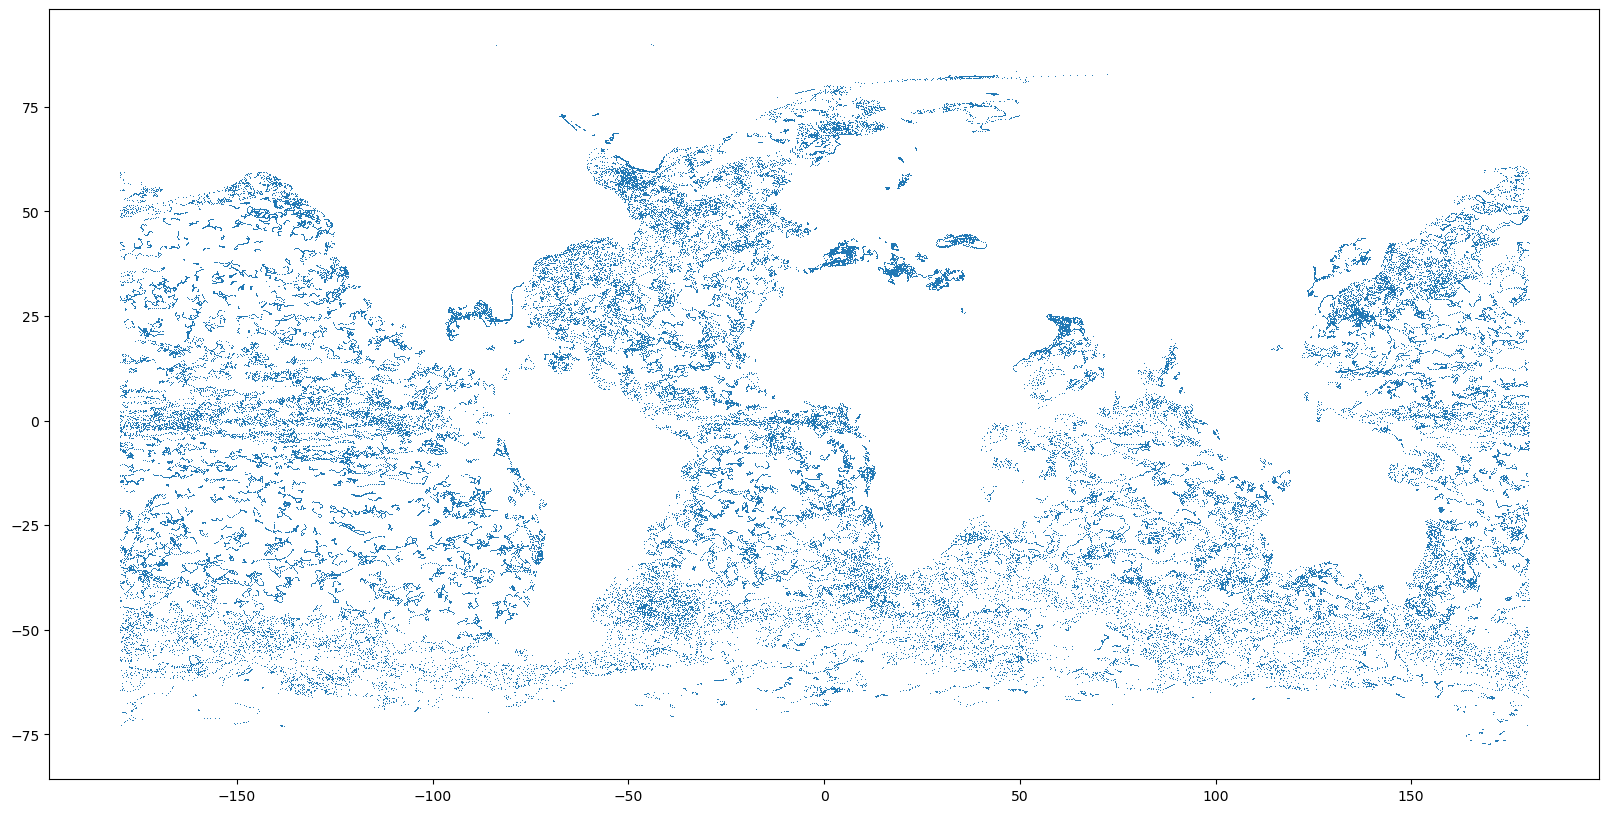

In [14]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(x=wod_pfl_2022.lon, y=wod_pfl_2022.lat, linewidths=0, s=0.5) 

In [16]:
DS = wod_pfl_2022

In [21]:


def WOD_plot(DS=DS,title='Title',save_flag=False,fname_path = '/g/data/xv83/users/tm4888/plots/',plot_format = 'png'):
    lat, lon = DS['lat'], DS['lon']
    #lon = (lon + 360)%360
    fig = plt.figure(figsize=(30,10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.coastlines()
    ax.set_global()
    plt.scatter(lon, lat, transform=ccrs.PlateCarree(),linewidth=0,s=1)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title(title)
    if save_flag == True:
        fname = fname_path + title +'.'+plot_format
        plt.savefig(fname,dpi=600,format=plot_format)

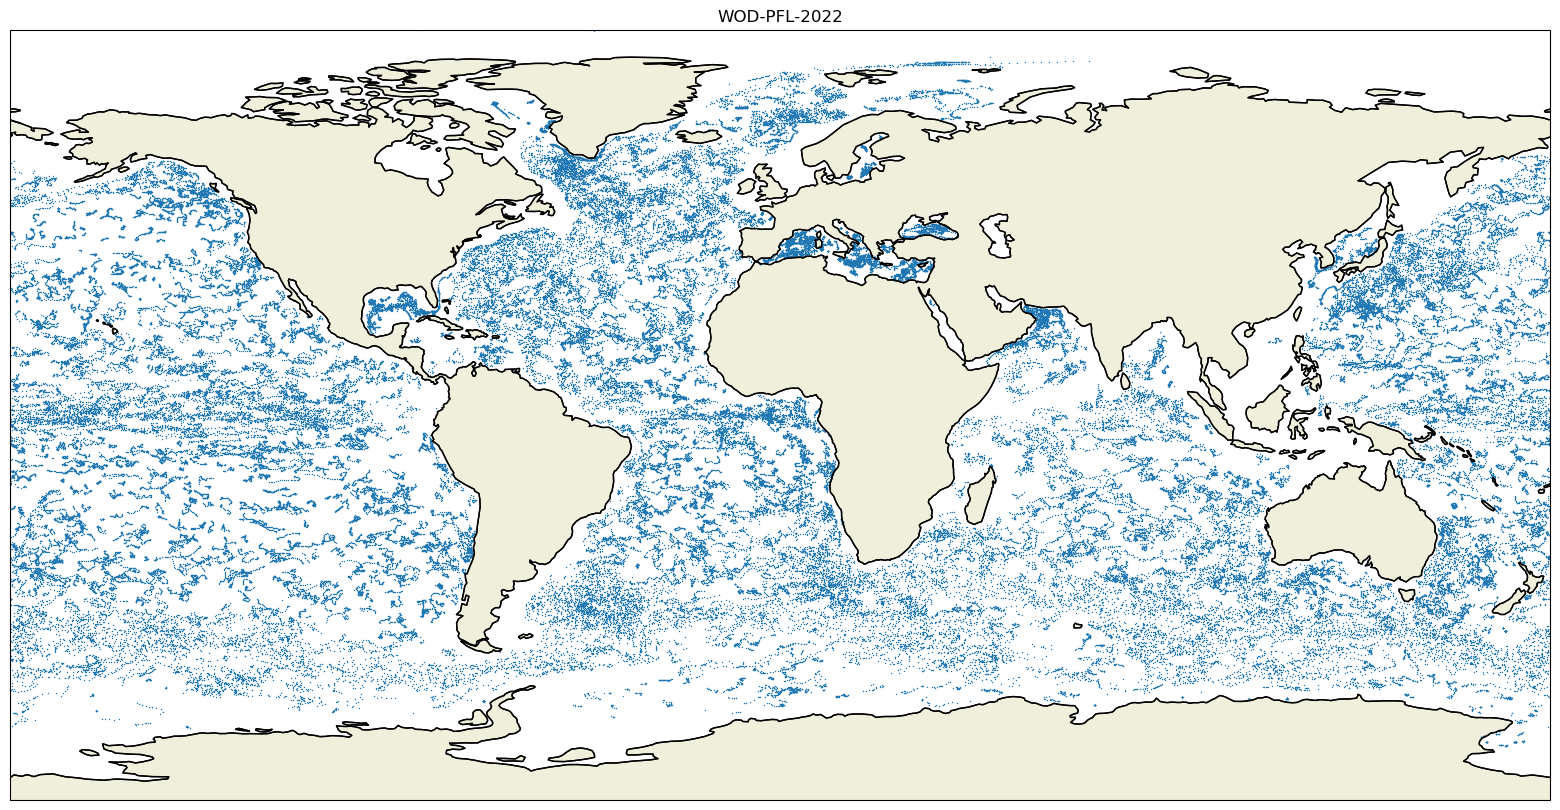

In [22]:
WOD_plot(DS=DS,title='WOD-PFL-2022',save_flag=False,fname_path = '/g/data/xv83/users/tm4888/plots/',plot_format = 'png')

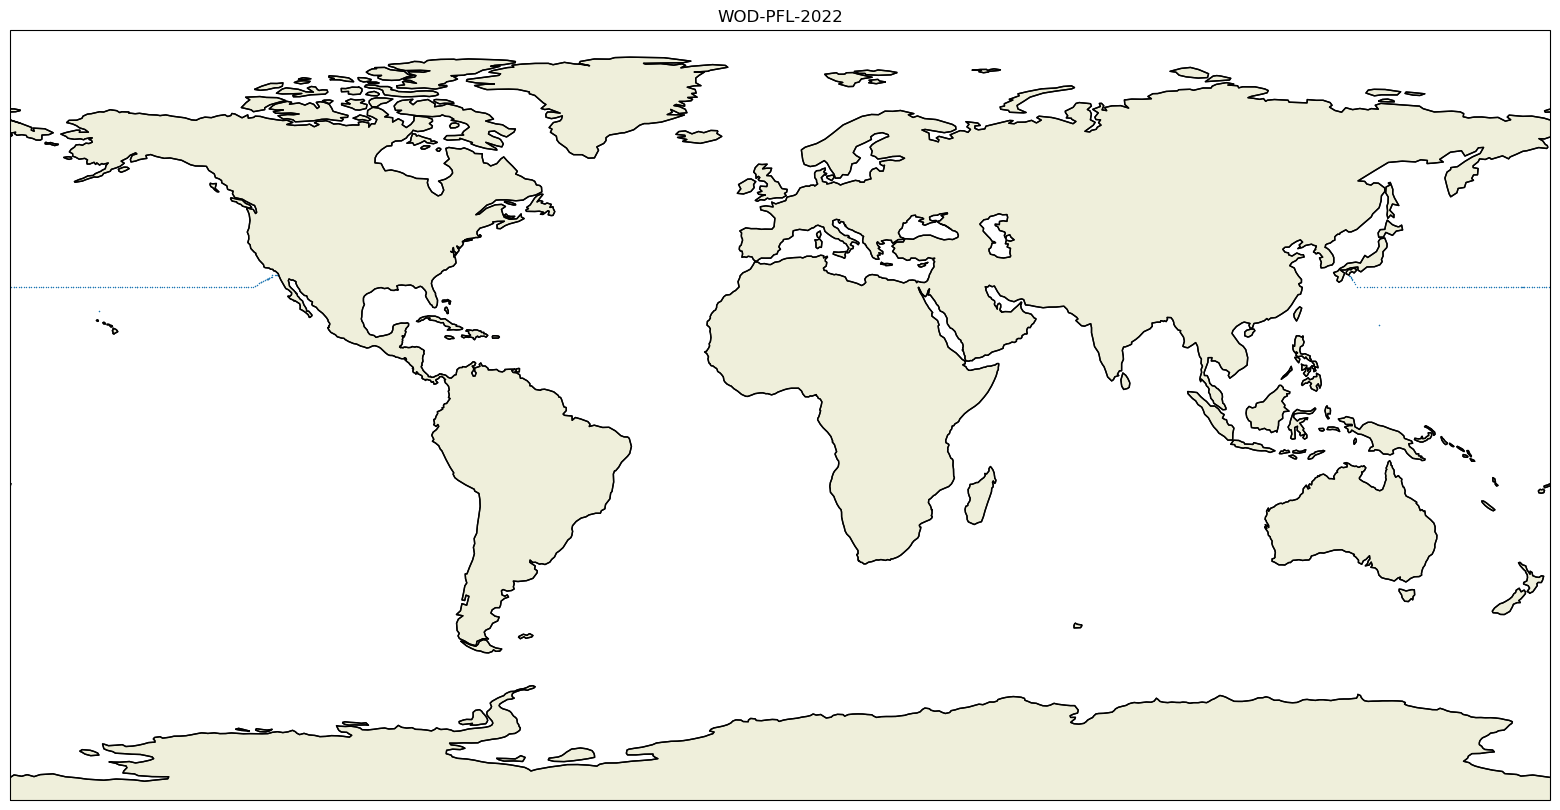

In [23]:
WOD_plot(DS=wod_osd_2022,title='WOD-PFL-2022',save_flag=False,fname_path = '/g/data/xv83/users/tm4888/plots/',plot_format = 'png')